# DSC550 Term Project Milestone 1 by Phil Han

### Major League Baseball (MLB) went through a lockout during the last off-season and almost lost a part of the 2022 season.  That wasn’t welcome news for the league which has experienced a steady decline in attendance and popularity among younger fans due to the slow pace of the game.  

### Given the current state of baseball, MLB does not have a salary cap on its teams.  Thus, big-market teams that have lucrative huge cable and TV deals have more resources to spend on top free agents to help their teams win a World Series title a lot more easily.  

### And that creates a lack of parity amongst the teams, and the lack of competitive balance does not bode well for mid-market teams that need to compete against such big-market teams like the New York Yankees and the Boston Red Sox. 

### My term project will attempt to reasonably predict a world series winner based on the past baseball data from a given season, mainly using the logistic regression and other classified methods.  Also, my model will attempt to find any features of winning a World Series title.  My target for this machine learning model is to win a World Series (WSWin).  

### But I will begin by a linear regression model to find relationship between winning and baseball stats, or categories, like Runs (R), Earned Run Average (ERA), Runs Allowed (RA), and Earned Runs (ER).  For this regression analysis, I've set winning (W) as a target variable.  

### I’ve made visualizations or graphs to explain each linear relationship between winning and the above categories.  And then, I’ve created a heatmap for a correlation between winning a World Series (WS) and other multiple categories.  For the Milestone 2, I am considering adding to the dataset a few more categories like On Base Percentage (OBP), Slugging Percentage (SLG), On Base Percentage Plus Slugging (OPS).  I’d like to find out if any of these extra categories have any impact on winning a WS title. 

### While predicting a WS winner, I will try to find out if any of the mid-market teams like the Kansas City Royals and the Cleveland Guardians have any chances of winning a WS title in 2022.  If not, my term project will focus on any categories that those mid-market teams should focus on to improve their chances of winning in the postseason and ultimately, hoisting a WS trophy. 

### In addition, on a side topic, my project will also attempt to look into categories that impact attendance of the game most by examining the correlation between attendance and factors like Home Runs and Triples that create dynamic actions around the diamond for the fans.  For this extra topic, my target will be attendance.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import yellowbrick
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Read Baseball Team data
df_team = pd.read_csv('Teams.csv')
df_team.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# Find the shape of the data
df_team.shape

(2805, 48)

### I will remove the rows that did not have any World Series data prior to 1903.  Also, I will most likely remove the data from 2020 where the season was abbreviated to just 60 games due to the pandemic.

In [4]:
# Since the first World Series took place in 1903, remove all rows prior to 1903.
df_team = df_team[415:]
df_team.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
415,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,...,86.0,0.95,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS
416,1903,NL,BRO,LAD,NaN,5,139,73.0,70,66,...,98.0,0.95,Brooklyn Superbas,Washington Park III,224670.0,97,98,BRO,BRO,BRO
417,1903,NL,BSN,ATL,NaN,6,140,68.0,58,80,...,89.0,0.93,Boston Beaneaters,South End Grounds III,143155.0,96,98,BSN,BSN,BSN
418,1903,AL,CHA,CHW,NaN,7,138,70.0,60,77,...,85.0,0.94,Chicago White Sox,South Side Park II,286183.0,96,95,CHW,CHA,CHA
419,1903,NL,CHN,CHC,NaN,3,139,73.0,82,56,...,78.0,0.94,Chicago Cubs,West Side Park II,386205.0,97,96,CHC,CHN,CHN


## Graphical Analysis for Scatter Charts:
### Figure 1 shows a scatter chart with regression between Wins (W) and Runs (R).  There seems to be a positive relationship as expected--The more runs scored, the more games won.  One thing to note in this graph is that when a season or team that won little more than 50 games but produced about 950 runs, which clearly seems to be an outlier.

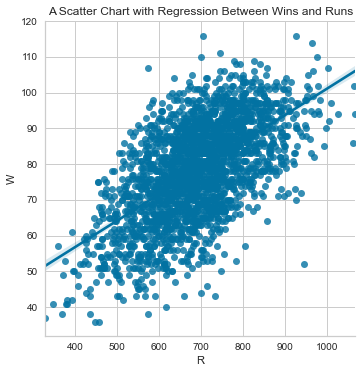

In [5]:
# Figure 1-Scatter plot with regression betweein Wins and Runs
sns.lmplot(x='R', y='W', data=df_team).set(title='A Scatter Chart with Regression Between Wins and Runs')

### Figure 2 shows a scatter chart with regression between Wins (W) and Earned Run Average (ERA).  There seems to be a negative relationship as expected--The less runs earned on average, the more games won.  One observation to note in this graph is that the regression line is very much reflective of about the average number of games a team needs to win to get into a postseason (about 90 to 95 games).  Based on the graph, it is increasingly harder to win more games, your team ERA goes up.  In other words, your team needs a pitching staff that features lower ERA's.

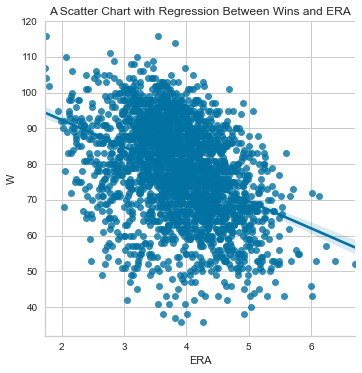

In [6]:
# Figure 2-Scatter plot with regression betweein Wins and Earned Run Average(ERA)
sns.lmplot(x='ERA', y='W', data=df_team).set(title='A Scatter Chart with Regression Between Wins and ERA')

### Figure 3 shows a scatter chart with regression between Wins (W) and Runs Allowed (RA).  There also seems to be a negative relationship as the Figure 2--The less runs allowed, the more games won.  One observation to note in this graph is that as in the Figure 2, the number of games decrease as you allow more runs in games which tells us that pitching matters.  Another way to put this fact is that your team needs solid pitching that limits your opponents' runs to win more ball games.

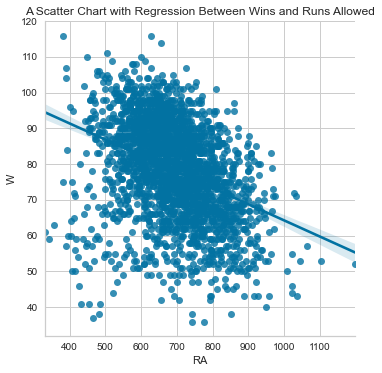

In [7]:
# Figure 3--Scatter plot with regression betweein Wins and Runs Allowed (RA)
sns.lmplot(x='RA', y='W', data=df_team).set(title='A Scatter Chart with Regression Between Wins and Runs Allowed')

In [8]:
df_team.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

### The below heatmap shows a correlation between winning and the above categories like run scored (R), earned run average (ERA), and runs allowed (RA) is consistent with the scatter charts.  However, winning a World Series (WSWin) does not seem to have any correlation with the aforementined categories.  It is mainly because the WSWin category is a non-numerical category.  Thus, for my next milestone, I will have to convert that WSWn category to a numerical category and perform data transformations and preprocess the data for Logistic Regression.  Also, I will try to add extra baseball metric categories like On Base Percentage (OBP), Slugging Percentage (SLG), On Base Percentage Plus Slugging (OPS) in order to see any of these extra categories have any bearing on winning a WS title. 

Text(0.5, 1.0, 'Correlation Heatmap Between Winning and Other Categories')

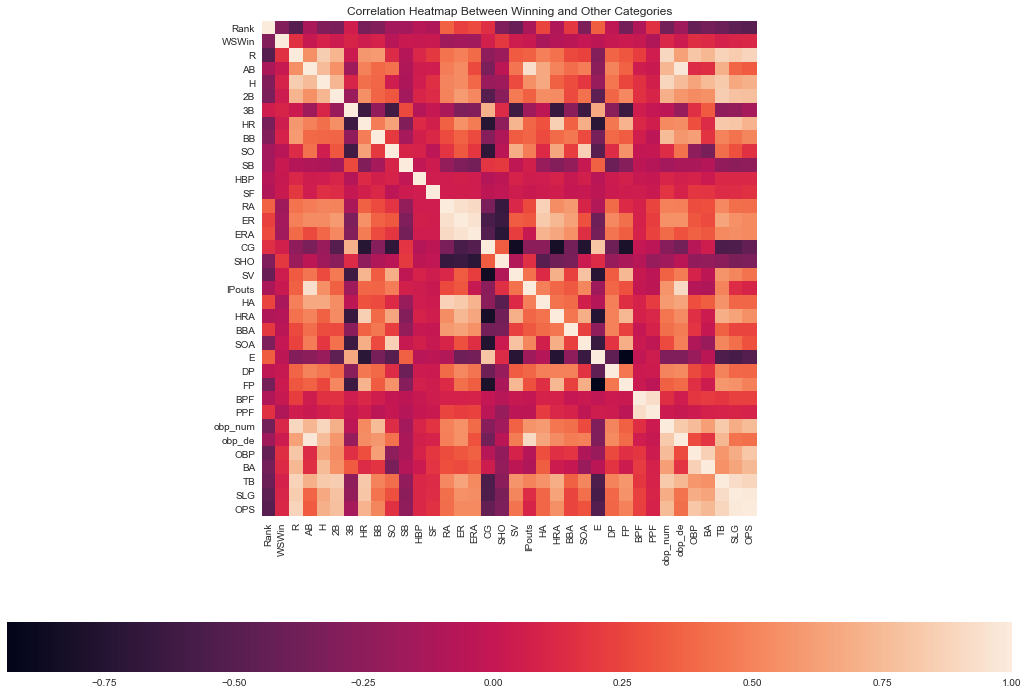

In [62]:
# Create a correlation heatmap, Figure 4.
fig, ax=plt.subplots(figsize=(18,13))

sns.heatmap(df_team.corr(), cbar_kws={'orientation':'horizontal'}, square=True)
plt.title("Correlation Heatmap Between Winning and Other Categories")

# Milestone 2 - Data Preparation (Week 8)

## Data Cleaning

### First of all, I've decided to drop columns that are not attributable to winning a World Series title such as Division ID, names of parks where team play, and team ID's and their retro ID's.  I am also removing Wins and Losses (i.e. Division Win, League Win, & Wild Card Win) since the number of games played in the past seasons vary over time.  For example, MLB introduced the Wild Card in 1994 to expand the playoff teams, so for 90 years prior to the inclusion of the Wild Card in the postseason, there were no Wild Card records available for each team.  However, I am keeping the the 'WSWin' (World Series Win) column.  More importantly, I will select the 'WSWin' column as my target variable so the other 'win' categories are not relevant to this analysis.


In [10]:
# Drop columns that are not applicable to this machine learning project
df_team = df_team.drop(['divID','G','Ghome','W','L','DivWin','WCWin','LgWin','park','teamIDBR',
                        'teamIDlahman45','teamIDretro'],axis=1)

In [11]:
# Drop the rows that contain NaN values
#df_team = df_team.dropna()

In [12]:
# Check data type for each category
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 415 to 2804
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      2390 non-null   int64  
 1   lgID        2390 non-null   object 
 2   teamID      2390 non-null   object 
 3   franchID    2390 non-null   object 
 4   Rank        2390 non-null   int64  
 5   WSWin       2330 non-null   object 
 6   R           2390 non-null   int64  
 7   AB          2390 non-null   int64  
 8   H           2390 non-null   int64  
 9   2B          2390 non-null   int64  
 10  3B          2390 non-null   int64  
 11  HR          2390 non-null   int64  
 12  BB          2390 non-null   int64  
 13  SO          2270 non-null   float64
 14  SB          2390 non-null   float64
 15  CS          1926 non-null   float64
 16  HBP         480 non-null    float64
 17  SF          480 non-null    float64
 18  RA          2390 non-null   int64  
 19  ER          2390 non-null

In [13]:
df_team.head()

,yearID,lgID,teamID,franchID,Rank,WSWin,R,AB,H,2B,...,HRA,BBA,SOA,E,DP,FP,name,attendance,BPF,PPF
415,1903,AL,BOS,BOS,1,Y,708,4919,1336,222,...,23,269,579,235,86.0,0.95,Boston Americans,379338.0,105,102
416,1903,NL,BRO,LAD,5,N,667,4534,1201,177,...,18,377,438,284,98.0,0.95,Brooklyn Superbas,224670.0,97,98
417,1903,NL,BSN,ATL,6,N,578,4682,1145,176,...,30,460,516,351,89.0,0.93,Boston Beaneaters,143155.0,96,98
418,1903,AL,CHA,CHW,7,N,516,4670,1152,176,...,23,287,391,297,85.0,0.94,Chicago White Sox,286183.0,96,95
419,1903,NL,CHN,CHC,3,N,695,4733,1300,191,...,14,354,451,314,78.0,0.94,Chicago Cubs,386205.0,97,96


In [14]:

# Find out to drop columns further with features that are missing more than 40% of their values
df_nan=df_team.columns[(df_team.isnull().sum()/df_team.shape[0] > 0.4)]
df_nan
#df_team1 =df_team.drop(col, axis=1).reset_index(drop=True)
#df_team1.head()



Index(['HBP', 'SF'], dtype='object')

In [15]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 415 to 2804
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      2390 non-null   int64  
 1   lgID        2390 non-null   object 
 2   teamID      2390 non-null   object 
 3   franchID    2390 non-null   object 
 4   Rank        2390 non-null   int64  
 5   WSWin       2330 non-null   object 
 6   R           2390 non-null   int64  
 7   AB          2390 non-null   int64  
 8   H           2390 non-null   int64  
 9   2B          2390 non-null   int64  
 10  3B          2390 non-null   int64  
 11  HR          2390 non-null   int64  
 12  BB          2390 non-null   int64  
 13  SO          2270 non-null   float64
 14  SB          2390 non-null   float64
 15  CS          1926 non-null   float64
 16  HBP         480 non-null    float64
 17  SF          480 non-null    float64
 18  RA          2390 non-null   int64  
 19  ER          2390 non-null

### To remove any columns that contain more than 40% of null values (NaN), we can drop HBP(Hit by Pitch) and SF (Sacrifice Flies by Opposing Batters) based on the above data info.  However, we will have to preserve both HBP and SF columns to figure out OBP (on-base percentage) and OPS (on-base percentage plus slugging).  Thus, we will keep them for now and instead drop CS (Caught Stealing).

In [16]:
# Drop the column 'CS' which stands for Caught Stealing.
df_team = df_team.drop(['CS'], axis=1)

### Before we perform feature engineering by adding columns for advanced metrics like OBP and OPS, we need to replcae the columns 'HBP' and 'SF', which contain more NaN's values than any other columns, with the median value of those columns.  By doing so, we will get more reasonable OBP and OPS values for those rows that were previously missing values.

In [17]:
# Replace the NaN values in the columns HBP and SF with the median values of those columns

df_team[['HBP','SF']]=df_team[['HBP','SF']].fillna(df_team[['HBP','SF']].median())

In [18]:
# Check to see if the columns for 'HBP' and 'SF' are filled with their medial values
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 415 to 2804
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      2390 non-null   int64  
 1   lgID        2390 non-null   object 
 2   teamID      2390 non-null   object 
 3   franchID    2390 non-null   object 
 4   Rank        2390 non-null   int64  
 5   WSWin       2330 non-null   object 
 6   R           2390 non-null   int64  
 7   AB          2390 non-null   int64  
 8   H           2390 non-null   int64  
 9   2B          2390 non-null   int64  
 10  3B          2390 non-null   int64  
 11  HR          2390 non-null   int64  
 12  BB          2390 non-null   int64  
 13  SO          2270 non-null   float64
 14  SB          2390 non-null   float64
 15  HBP         2390 non-null   float64
 16  SF          2390 non-null   float64
 17  RA          2390 non-null   int64  
 18  ER          2390 non-null   int64  
 19  ERA         2390 non-null

# Feature Engineering

### Now we are adding some offensive metrics to the teams data.  Two main categories to add are OBP (on-base percentage) and OPS (on-base percentage plus slugging) which are considered important offensive stats in modern baseball.  OBP is a statistical formula that indicates how often a batter reaches a base overall.  And OPS adds OBP to slugging percentage to get one number.  OPS indicates how well a hitter can reach base, with how well he can hit for average and power per MLB.com.

In [19]:
# OBP - On base percentage - (H + BB + HBP) dvided by AB (at bats) plus BB (walks) plus hit by pitch (HBP)
df_team['obp_num'] = (df_team['H']+df_team['BB'] +df_team['HBP'])

In [20]:
# (AB + BB + HBP +SF)
df_team['obp_de'] = (df_team['AB']+df_team['BB']+df_team['HBP'] +df_team['SF'])

In [21]:
# OBP = (H + BB + HBP) / (AB+ BB + HBP +SF)
df_team['OBP'] = df_team['obp_num']/df_team['obp_de']

In [22]:
# BA - Batting Average - hits divided by at bats
df_team['BA'] = df_team['H'] / df_team['AB']

In [23]:
# TB - Total bases - one for each single, two for each double, three for each triple, and four for each home run
df_team['TB'] = df_team['H'] + 2*df_team['2B'] + 3*df_team['3B'] + 4*df_team['HR']

In [24]:
# Slugging Average - TB divided by AB
df_team['SLG'] = df_team['TB'] / df_team['AB']

In [25]:
# OPS - On Base Percentage plus Slugging
df_team['OPS']=df_team['OBP'] + df_team['SLG']

In [26]:
df_team.tail()

,yearID,lgID,teamID,franchID,Rank,WSWin,R,AB,H,2B,...,attendance,BPF,PPF,obp_num,obp_de,OBP,BA,TB,SLG,OPS
2800,2015,NL,LAN,LAD,1,N,667,5385,1346,263,...,3764815.0,101,98,1969.0,6038.0,0.326101,0.249954,2698,0.501021,0.827123
2801,2015,NL,SFN,SFG,2,N,696,5565,1486,288,...,3375882.0,99,97,1992.0,6108.0,0.326130,0.267026,2723,0.489308,0.815438
2802,2015,NL,ARI,ARI,3,N,720,5649,1494,289,...,2080145.0,107,106,2017.0,6229.0,0.323808,0.264472,2832,0.501328,0.825136
2803,2015,NL,SDN,SDP,4,N,650,5457,1324,260,...,2459742.0,98,97,1790.0,5965.0,0.300084,0.242624,2544,0.466190,0.766274
2804,2015,NL,COL,COL,5,N,737,5572,1479,274,...,2506789.0,119,118,1900.0,6027.0,0.315248,0.265434,2918,0.523690,0.838938


In [27]:
# Find NaN values after the feature engineering
df_team.isna().any()

yearID        False
lgID          False
teamID        False
franchID      False
Rank          False
WSWin          True
R             False
AB            False
H             False
2B            False
3B            False
HR            False
BB            False
SO             True
SB            False
HBP           False
SF            False
RA            False
ER            False
ERA           False
CG            False
SHO           False
SV            False
IPouts        False
HA            False
HRA           False
BBA           False
SOA           False
E             False
DP            False
FP            False
name          False
attendance     True
BPF           False
PPF           False
obp_num       False
obp_de        False
OBP           False
BA            False
TB            False
SLG           False
OPS           False
dtype: bool

## Based on the above data info, after the feature engineering, we still have columns, or categories, with NaN values on the 'WSWin', 'SO', and 'attendance' columns.  Thus, we need to replace their NaN values with median value from the respective columns.  And as for the WSWin column, though, we will simply replace the NaN values with )'s so as not to affect the overall model.

In [28]:
# Replace the NaN values in the columns SO and attendance with the median values of those columns

df_team[['SO','attendance']]=df_team[['SO','attendance']].fillna(df_team[['SO','attendance']].median())

In [29]:
# Replace the NaN values in the WSWin column with 0's
df_team = df_team.replace(np.nan,0)

# Check the data to see if there are still any NaN values.
df_team.isna().any()

yearID        False
lgID          False
teamID        False
franchID      False
Rank          False
WSWin         False
R             False
AB            False
H             False
2B            False
3B            False
HR            False
BB            False
SO            False
SB            False
HBP           False
SF            False
RA            False
ER            False
ERA           False
CG            False
SHO           False
SV            False
IPouts        False
HA            False
HRA           False
BBA           False
SOA           False
E             False
DP            False
FP            False
name          False
attendance    False
BPF           False
PPF           False
obp_num       False
obp_de        False
OBP           False
BA            False
TB            False
SLG           False
OPS           False
dtype: bool

## Data Transformation

### I am planning on using the 'WSWin' (World Series Win) column as my target variable.  Since it is a categorical variable, I've decided to create dummy variables for that column for my upcoming modeling. 

In [30]:
# Create a dummy variable for the WSWin (World Series Win) column which is an object or categorical (Y or N)
#df_team = pd.get_dummies(df_team, columns=['WSWin'])

### After performing the get_dummies operation, we have just created the following variables off of the categorical variable 'WSWin': 'WSWin_0', 'WSWin_N, 'WSWin_Y'.  But in the end, instead of creating an extra variable (or column), we decided to convert the values 'Y' and 'N' into '1' for win and '0' for loss for simple and clean data splitting.

In [31]:
df_team.head(10)

,yearID,lgID,teamID,franchID,Rank,WSWin,R,AB,H,2B,...,attendance,BPF,PPF,obp_num,obp_de,OBP,BA,TB,SLG,OPS
415,1903,AL,BOS,BOS,1,Y,708,4919,1336,222,...,379338.0,105,102,1652.0,5279.0,0.312938,0.271600,2311,0.469811,0.782749
416,1903,NL,BRO,LAD,5,N,667,4534,1201,177,...,224670.0,97,98,1777.0,5154.0,0.344781,0.264888,1783,0.393251,0.738032
417,1903,NL,BSN,ATL,6,N,578,4682,1145,176,...,143155.0,96,98,1597.0,5178.0,0.308420,0.244554,1738,0.371209,0.679629
418,1903,AL,CHA,CHW,7,N,516,4670,1152,176,...,286183.0,96,95,1531.0,5093.0,0.300609,0.246681,1707,0.365525,0.666133
419,1903,NL,CHN,CHC,3,N,695,4733,1300,191,...,386205.0,97,96,1776.0,5253.0,0.338093,0.274667,1904,0.402282,0.740374
420,1903,NL,CIN,CIN,4,N,765,4857,1399,228,...,351680.0,111,109,1856.0,5358.0,0.346398,0.288038,2243,0.461808,0.808206
421,1903,AL,CLE,CLE,3,N,639,4773,1265,231,...,311280.0,98,96,1578.0,5130.0,0.307602,0.265032,2136,0.447517,0.755120
422,1903,AL,DET,DET,5,N,567,4582,1229,162,...,224523.0,96,97,1575.0,4972.0,0.316774,0.268223,1874,0.408992,0.725766
423,1903,NL,NY1,SFG,2,N,729,4741,1290,181,...,579530.0,104,102,1723.0,5218.0,0.330203,0.272094,1879,0.396330,0.726533
424,1903,AL,NYA,NYY,4,N,579,4565,1136,193,...,211808.0,106,105,1522.0,4995.0,0.304705,0.248850,1780,0.389923,0.694628


# Milestone 3: Model Building and Evaluation (Week 10)

### Before I start the milestone 3, I've redefined what this project is intended to solve.  That is, I clarified and redefined what this project will do:

### My term project will attempt to reasonably predict a World Series winner based on the past baseball data from a given season, mainly using the logistic regression and other classified methods.  Also, my model will attempt to find any features of winning a World Series title.  My target for this machine learning model is to win a World Series (WSWin).  This term project is not meant to predict a World Series winner in the current MLB season nor a future season.

In [32]:
# Check the data info again
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 415 to 2804
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      2390 non-null   int64  
 1   lgID        2390 non-null   object 
 2   teamID      2390 non-null   object 
 3   franchID    2390 non-null   object 
 4   Rank        2390 non-null   int64  
 5   WSWin       2390 non-null   object 
 6   R           2390 non-null   int64  
 7   AB          2390 non-null   int64  
 8   H           2390 non-null   int64  
 9   2B          2390 non-null   int64  
 10  3B          2390 non-null   int64  
 11  HR          2390 non-null   int64  
 12  BB          2390 non-null   int64  
 13  SO          2390 non-null   float64
 14  SB          2390 non-null   float64
 15  HBP         2390 non-null   float64
 16  SF          2390 non-null   float64
 17  RA          2390 non-null   int64  
 18  ER          2390 non-null   int64  
 19  ERA         2390 non-null

In [33]:
# Load libraries for modeling and evaluating
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load libraries for train_test split and, cross val_score, confustion matrix, and classficiatino report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
# Drop columns further (especially those unnecesaary categorical columns) for better modeling 
df_team=df_team.drop(['yearID','lgID','teamID','franchID','name','attendance'], axis=1)


In [35]:
# Convert the object column for 'WSWin' to int: No for 0 and Yes for 1
output = {"N": 0, "Y":1}
df_team['WSWin']= df_team['WSWin'].replace(output)

In [39]:
#Split the data into a training and test set, where the "WSWin" column is the target

X = df_team.drop('WSWin', axis=1)
y = df_team['WSWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

## First, use a Linear Regression Model

In [40]:
# Fit Linear Regression to the Training set for the first modeling

from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
# Find score for our regression model
score = model_reg.score(X_train, y_train)
print("\n\nModel Score : ", score)

# Find score for our regression model
score = model_reg.score(X_test, y_test)
print("\n\nModel Score : ", score)



Model Score :  0.1266072990763255


Model Score :  0.14098700106519768


### The linear regression model generated a pretty low accuracy of 14.18% as expected since the data contains so many features or variables that contribute to winning a World Series title. 

In [42]:
# Predict the Test set results
y_pred = model_reg.predict(X_test)
print(y_pred)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

[ 0.15966319  0.04848395  0.11442143  0.0312998  -0.0738576   0.05959756
  0.02943123  0.09774868 -0.03707043  0.06923401  0.07947357 -0.09697164
  0.00338182  0.11267304  0.03147659 -0.1068129   0.11638147 -0.02186165
  0.01936357  0.04869535  0.12064054 -0.04517527 -0.02815773 -0.00098731
 -0.03241437  0.08932805  0.09799523  0.04365372 -0.11433153 -0.00504928
  0.04405132  0.01152158 -0.03158141  0.08926095  0.22335179  0.00149941
  0.05021059  0.00130147  0.17991279  0.11539067  0.10718921 -0.05957818
 -0.00721138  0.03953372  0.09633572  0.07152143  0.12130609  0.09646537
  0.13910374 -0.00968823 -0.01970273  0.00903176  0.08561175  0.24651374
  0.05323354 -0.0577928   0.00449478  0.01223185 -0.01224499  0.09789853
  0.02937369 -0.02068897  0.03964002 -0.00157325 -0.05342549  0.03198927
  0.11931915 -0.06372712 -0.02366705  0.12964101  0.17562955  0.15347961
  0.01133116  0.07196871 -0.0337718  -0.05772236  0.06803721  0.08830853
  0.20987123  0.04723959 -0.0389745   0.12220077 -0

## The second model to use is a Decision Tree Classifier Model

In [43]:
# Now use the Decision Tree Classifier for another modeling

#Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

clf = DecisionTreeClassifier(max_depth =3,random_state=42)
dt=clf.fit(X_train,y_train)

In [44]:
# Report the accuracy and create a confusion matrix for the Decision Tree Classifier model prediction on the test set

y_pred_clf = dt.predict(X_test)

print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_clf))

print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100,2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       450
           1       0.75      0.21      0.33        28

    accuracy                           0.95       478
   macro avg       0.85      0.60      0.65       478
weighted avg       0.94      0.95      0.94       478

Test Accuracy: 94.98%


## Surprisingly, the Decision Tree Classifier model produced a fairly high accuracy result of 94.98%. 

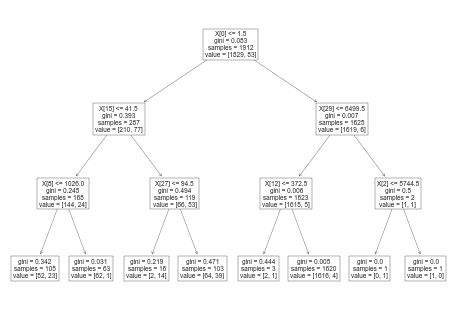

In [45]:
# Create a visualization of the decision tree
from sklearn import tree

tree.plot_tree(clf);

In [46]:
# Print important features from the decision tree model
print("Feature Importance", clf.feature_importances_)
imp_features = pd.DataFrame(zip(X_train.columns, clf.feature_importances_))
imp_features.sort_values(by=[1], ascending=False).head()

Feature Importance [0.57286168 0.         0.01677226 0.         0.         0.
 0.         0.         0.05452314 0.         0.         0.
 0.0109961  0.         0.         0.21384885 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.11445214 0.         0.01654582
 0.         0.         0.         0.         0.        ]


,0,1
0,Rank,0.572862
15,CG,0.213849
27,PPF,0.114452
8,SO,0.054523
2,AB,0.016772


## Apply a Logistic Regression Model to the test set

In [47]:
# Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred_log = LogReg.predict(X_test)

/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
metrics.accuracy_score(y_test, y_pred_log)

0.9393305439330544

In [49]:
# 5. Report the accuracy and create a confusion matrix for the model prediction on the test set

y_pred_log =LogReg.predict(X_test)

print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_log))

print("Test Accuracy: {}%".format(round(LogReg.score(X_test, y_test)*100,2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       450
           1       0.44      0.14      0.22        28

    accuracy                           0.94       478
   macro avg       0.70      0.57      0.59       478
weighted avg       0.92      0.94      0.92       478

Test Accuracy: 93.93%


### The logistic regression also produced a high accuracy of 93.93% but surprising a slightly less accurate than the decision tree classifier model.  I expected the former to have a higer accuracy since the target variable is a categorical variable where the logistic regression model would be ideal for the best accuracy outcome. 

In [50]:
# Load libraries for the Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler



## Create a Pipeline for such models as K Nearest Neighbors (KNN) and Random Forest, including the above models, using a grid search and an expanded search space with hyperparameter tuning.

In [51]:
# Create a pipeline for a MinMax Scaler and KNN Classifier
pipe = Pipeline(steps=[('Scaler', MinMaxScaler()), 
                    ("Classifier", KNeighborsClassifier())])

In [52]:
# Now Expand your search space to include logistic regression, random forest, and Decision Tree Classifier models   

search_space =[{'Classifier': [LogisticRegression(solver = 'liblinear')],
               'Classifier__penalty': ["l1","l2"],
               'Classifier__C': np.logspace(-10,4,10)},
                {'Classifier': [RandomForestClassifier()],
                'Classifier__n_estimators': [10,100,1000],
                'Classifier__max_features':[1,2,3]},
                {'Classifier__n_neighbors': list(range(1,11,1)),
                 'Classifier__weights':['uniform','distance']},
                {'Classifier': [DecisionTreeClassifier()],
                'Classifier__max_depth': [None,2,4,6,10]}]

In [53]:
# Create a new grid search with the expanded search space 
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe, search_space, cv=5, scoring='accuracy', verbose=1)

In [54]:
# Fit with the expanded search space 
best_model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
# What are the best model and hyperparameters found in the grid search?  
best_model.best_estimator_.get_params()["Classifier"]

LogisticRegression(C=7.742636826811277, penalty='l1', solver='liblinear')

## Per the Grid Search, the best model with hyperparameters tuning turned out to be the Logistic Regression Model, edging the Decision Tree Classifier Model. 

In [113]:
# Find the accuracy of this model on the test set
accuracy_score(y_test, best_model.predict(X_test))

0.9497907949790795

In [114]:
# Report the accuracy and create a confusion matrix for the Best_Model prediction on the test set

y_pred_best =best_model.predict(X_test)

print("Best Model report: \n\n", classification_report(y_test, y_pred_best))

print("Test Accuracy: {}%".format(round(best_model.score(X_test, y_test)*100,2)))

Best Model report: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       450
           1       0.70      0.25      0.37        28

    accuracy                           0.95       478
   macro avg       0.83      0.62      0.67       478
weighted avg       0.94      0.95      0.94       478

Test Accuracy: 94.98%


In [122]:
'''
# Plot a grah for the best features

fig, ax = plt.subplots(figsize=(17,15))
best_graph = best_graph.drop('Rank', axis=1)
ax= best_graph.plot(kind='barh', title="Best Model Feature Importance", ax=ax, legend=True)
ax.set_ylabel('Importance', fontsize=16)
ax.set_xlabel('Features', fontsize=16)
plt.show()

'''


'\n# Plot a grah for the best features\n\nfig, ax = plt.subplots(figsize=(17,15))\nbest_graph = best_graph.drop(\'Rank\', axis=1)\nax= best_graph.plot(kind=\'barh\', title="Best Model Feature Importance", ax=ax, legend=True)\nax.set_ylabel(\'Importance\', fontsize=16)\nax.set_xlabel(\'Features\', fontsize=16)\nplt.show()\n\n'

### Based on the above results, initially, the decision tree classifier model unexpectedly had a higher accuracy than the logistic regression model.  Since both models produced fairly high accuracy, I decided to apply a couple more models like random tree classifier and K Nearest Neighbors (KNN).  

### I put all of the models in a pipeline with hyperparameter tuning to find out the best model with a better or more accurate test result, using a grid search with an expanded search space.  And the logistic reression model came out to be the best model amongst the all models tested. 

### This seems to make sense since hyperparameters tuning not only optimized the model's performance buit also helped to find a set of optimal values for a learning algorithm while applying the optimized algoritham to the data set.  In other words, both the decision tree classifier and even the logistic regression models might not have been optimized before hyperparameter tuning.  Thus, after the hyperparameter tuning, the logistic regression model seems to have produced the most accurate outcome of the modeling to predict a World Series winner in a given year from the prior baseball data.

### In the next milestone, I will attempt to find features that contribute to winning a WS title and summarize my findings.  I've also decided not to do a small extra research on what features from the data impact attendance in the game as part of this term project so that I can fine tune and finish the current project with a more coherent topic.

# Milestone 4 - Term Project Final Submission

### Based on closer eximination, the high accuracy of the model to predict a WS winner turned out to be the opposite--it correctly predicts a WS loss with over 94% accuracy.  The issue is due to having an imbalanced dataset where the target variable 'WSWin' contains the number of losses overwhelmingly outweigh the number of wins.

In [69]:
# Print Important Features from the Best Model (Logistic Regression)
Best_ImpFeat=best_model.best_estimator_.steps[1][1].coef_
print(Best_ImpFeat)

[[-22.63330835   7.73178469   0.           0.          -0.43391994
    2.49311838  -0.15656634  -0.97906896  -1.08144361  -1.21666167
    1.93901732   0.          -2.12193842   0.           0.
   -0.45413535   2.46249023   1.39320878   0.          -3.056383
   -0.65639077   0.31788064  -0.32158821  -2.24142868   0.16669665
   -0.37686337   1.22366679  -1.57623958   0.           0.
    0.           0.           0.          -2.60543143   0.        ]]


In [70]:
# Print important features from the decision tree model

# Create a dataframe for best features based on coefficiency 
best_feat = pd.DataFrame(Best_ImpFeat)
best_feat=best_feat.transpose()
best_feat["Features"]=X.columns
best_feat.columns =["Importance","Features"]
best_ft_final = best_feat.sort_values(by="Importance", ascending=False)
pd.set_option('display.float_format', '{:.2f}'.format)
best_ft_final.head(5)

,Importance,Features
1,7.73,R
5,2.49,3B
16,2.46,SHO
10,1.94,HBP
17,1.39,SV


In [71]:
# Create a dataframe for best features based on coefficiency 
best_graph = pd.DataFrame(data=Best_ImpFeat, columns=X.columns)

In [72]:
# Drop a row for 'Rank'
best_ft_final.drop([0], axis=0, inplace=True)

Text(0.5, 1.0, 'Best Model Coefficients')

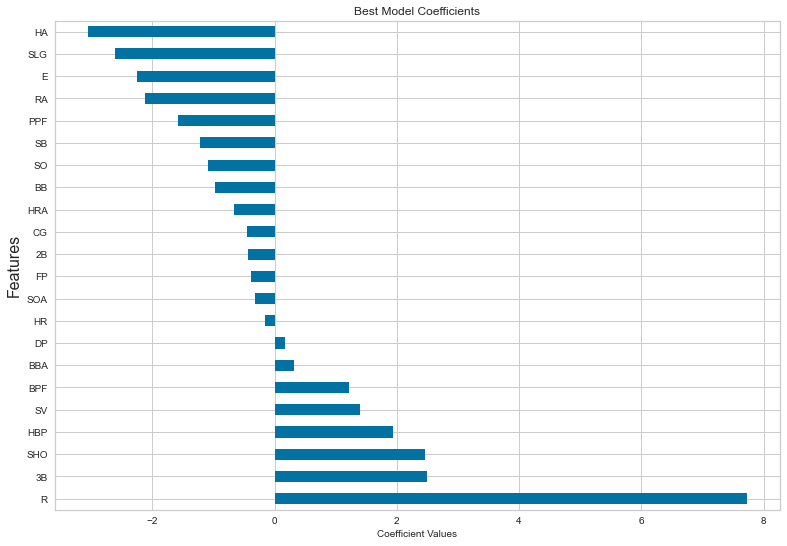

In [73]:
# Plot a bar histogram for the best features to consider in winning a world series 

fig, ax = plt.subplots(figsize=(13,9))
best_ft_final.loc[best_ft_final['Importance'] !=0].plot.barh(x='Features', y= 'Importance', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_xlabel('Coefficient Values', fontsize=10)
ax.set_title('Best Model Coefficients')

#plt.savefig('PNG/best_ws_winning_model_coef.png', dpi=300, 
 #           bbox_inches= 'tight', padding_inches = 4, transparent = True )

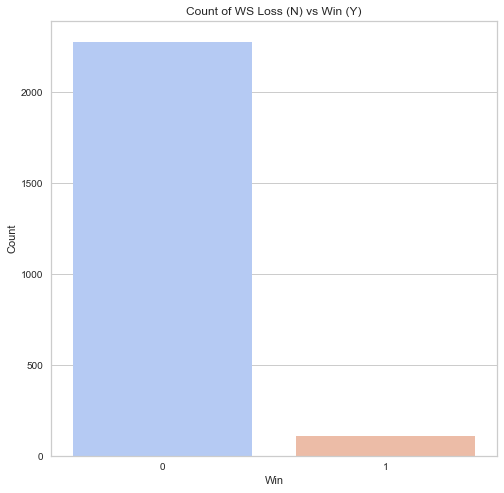

In [65]:
# Plot a graph to show the count of WS Losses and Wins
fig, axes = plt.subplots(figsize=(8,8))

sns.countplot(x='WSWin', data=df_team, palette = 'coolwarm')

axes.set_ylabel('Count')
axes.set_xlabel('Win')
axes.set_title('Count of WS Loss (N) vs Win (Y)')

plt.show()

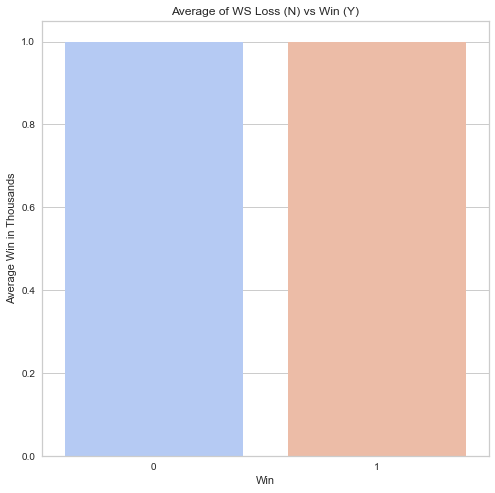

In [66]:
# Plot a graph to show the avearge of WS Losses and Wins

x = df_team.groupby('WSWin').R.mean().reset_index()

fig, axes = plt.subplots(figsize=(8,8))

sns.countplot(x='WSWin', data=x, palette = 'coolwarm')

axes.set_ylabel('Average Win in Thousands')
axes.set_xlabel('Win')
axes.set_title('Average of WS Loss (N) vs Win (Y)')

plt.show()

In [67]:
# Calculate the mean of 'WSWin' for Loss (0) and Win (1)
df_team.groupby('WSWin').R.mean().reset_index()

,WSWin,R
0,0,686.491882
1,1,771.909910


### To address the issue of imbalanced classes, I will use the three techniques 1. Undersampling, 2. Oversampling, and 3. Creating synthetic data (SMOTE) in the future.

## Potential challenges and additional opportunites that still need to be explored

### Predict if the KC Royals won the World Series in 2015

In [64]:
# Read Baseball Team data
df_team1 = pd.read_csv('Teams.csv')
df_team1.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [135]:
df_team1.loc[((df_team1['yearID']=='2015') & df_team1['WSWin']=='Y')]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro


In [136]:
df_team1.tail(30)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2775,2015,AL,KCA,KCR,C,1,162,81.00,95,67,...,138.00,0.98,Kansas City Royals,Kauffman Stadium,2708549.00,104,103,KCR,KCA,KCA
2776,2015,AL,MIN,MIN,C,2,162,81.00,83,79,...,150.00,0.99,Minnesota Twins,Target Field,2220054.00,103,104,MIN,MIN,MIN
2777,2015,AL,CLE,CLE,C,3,161,80.00,81,80,...,136.00,0.99,Cleveland Indians,Progressive Field,1388905.00,106,106,CLE,CLE,CLE
2778,2015,AL,CHA,CHW,C,4,162,81.00,76,86,...,159.00,0.98,Chicago White Sox,U.S. Cellular Field,1755810.00,97,96,CHW,CHA,CHA
2779,2015,AL,DET,DET,C,5,161,81.00,74,87,...,165.00,0.99,Detroit Tigers,Comerica Park,2726048.00,97,98,DET,DET,DET
2780,2015,AL,TOR,TOR,E,1,162,81.00,93,69,...,145.00,0.98,Toronto Blue Jays,Rogers Centre,2794891.00,99,98,TOR,TOR,TOR
2781,2015,AL,NYA,NYY,E,2,162,81.00,87,75,...,135.00,0.98,New York Yankees,Yankee Stadium III,3193795.00,99,101,NYY,NYA,NYA
2782,2015,AL,BAL,BAL,E,3,162,78.00,81,81,...,134.00,0.99,Baltimore Orioles,Oriole Park at Camden Yards,2281202.00,103,104,BAL,BAL,BAL
2783,2015,AL,TBA,TBD,E,4,162,84.00,80,82,...,118.00,0.98,Tampa Bay Rays,Tropicana Field,1287054.00,100,102,TBR,TBA,TBA
2784,2015,AL,BOS,BOS,E,5,162,81.00,78,84,...,148.00,0.98,Boston Red Sox,Fenway Park II,2880694.00,104,107,BOS,BOS,BOS


In [137]:
df_team.tail(30)

,Rank,WSWin,R,AB,H,2B,3B,HR,BB,SO,...,FP,BPF,PPF,obp_num,obp_de,OBP,BA,TB,SLG,OPS
2775,1,1,724,5575,1497,300,42,139,383,973.00,...,0.98,104,103,1957.00,6082.00,0.32,0.27,2779,0.50,0.82
2776,2,0,696,5467,1349,277,44,156,439,1264.00,...,0.99,103,104,1828.00,5987.00,0.31,0.25,2659,0.49,0.79
2777,3,0,669,5439,1395,303,29,141,533,1157.00,...,0.99,106,106,1967.00,6061.00,0.32,0.26,2652,0.49,0.81
2778,4,0,622,5533,1381,260,27,136,404,1231.00,...,0.98,97,96,1850.00,6039.00,0.31,0.25,2526,0.46,0.76
2779,5,0,689,5605,1515,289,49,151,455,1259.00,...,0.99,97,98,2011.00,6136.00,0.33,0.27,2844,0.51,0.84
2780,1,0,891,5509,1480,308,17,232,570,1151.00,...,0.98,99,98,2104.00,6195.00,0.34,0.27,3075,0.56,0.90
2781,2,0,764,5567,1397,272,19,212,554,1227.00,...,0.98,99,101,2014.00,6238.00,0.32,0.25,2846,0.51,0.83
2782,3,0,713,5485,1370,246,20,217,418,1331.00,...,0.99,103,104,1839.00,5986.00,0.31,0.25,2790,0.51,0.82
2783,4,0,644,5485,1383,278,32,167,436,1310.00,...,0.98,100,102,1903.00,6052.00,0.31,0.25,2703,0.49,0.81
2784,5,0,748,5640,1495,294,33,161,478,1148.00,...,0.98,104,107,2019.00,6206.00,0.33,0.27,2826,0.50,0.83


In [141]:
df_team.loc[2775,:]

Rank         1.00
WSWin        1.00
R          724.00
AB        5575.00
H         1497.00
2B         300.00
3B          42.00
HR         139.00
BB         383.00
SO         973.00
SB         104.00
HBP         77.00
SF          47.00
RA         641.00
ER         601.00
ERA          3.73
CG           2.00
SHO          8.00
SV          56.00
IPouts    4356.00
HA        1372.00
HRA        155.00
BBA        489.00
SOA       1160.00
E           88.00
DP         138.00
FP           0.98
BPF        104.00
PPF        103.00
obp_num   1957.00
obp_de    6082.00
OBP          0.32
BA           0.27
TB        2779.00
SLG          0.50
OPS          0.82
Name: 2775, dtype: float64

In [142]:
# Create a list of the stats for the 2015 KC Royals
kcroyals2015=[[1.00,
724.00,
5575.00,
1497.00,
300.00,
42.00,
139.00,
383.00,
973.00,
104.00,
77.00,
47.00,
641.00,
601.00,
3.73,
2.00,
8.00,
56.00,
4356.00,
1372.00,
155.00,
489.00,
1160.00,
88.00,
138.00,
0.98,
104.00,
103.00,
1957.00,
6082.00,
0.32,
0.27,
2779.00,
0.50,
0.82]]

In [144]:
# Predict if the KC Royals won the World Series in 2015
pred = LogReg.predict(kcroyals2015)
best_pred = best_model.predict(kcroyals2015)

print(pred)
print(best_pred)

[0]
[0]


/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### The best model did not predict the 2015 WS winner correctly.  As such, if I have additional opportunites, I will simplify the dataset by removing extra stats like OBP and OPS which contain two stats (HBP and SF) that have more than 40% of null values.